In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch

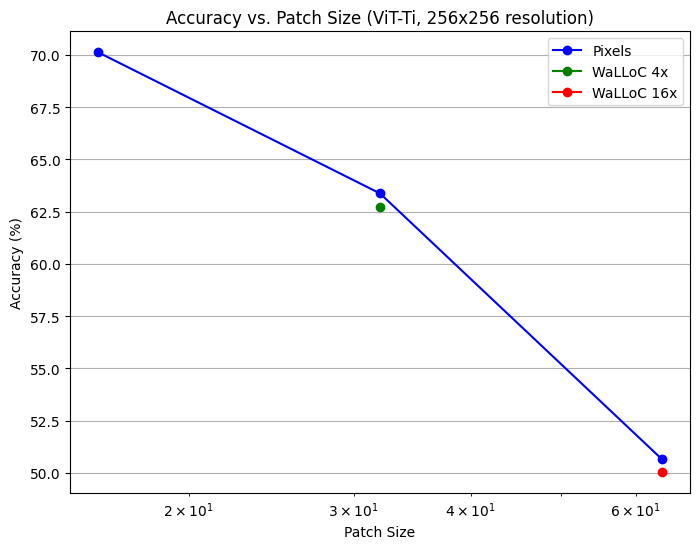

In [12]:
patch_sizes = [16, 32, 64]
pixels_acc = [70.12, 63.37, 50.66]
walloc_4x_acc = [np.nan, 62.74, np.nan]
walloc_16x_acc = [np.nan, np.nan, 50.03]

# Create the plot
plt.figure(figsize=(8, 6))
plt.semilogx(patch_sizes, pixels_acc, marker='o', label='Pixels', color='blue')
plt.plot(patch_sizes, walloc_4x_acc, marker='o', label='WaLLoC 4x', color='green')
plt.plot(patch_sizes, walloc_16x_acc, marker='o', label='WaLLoC 16x', color='red')

plt.title('Accuracy vs. Patch Size (ViT-Ti, 256x256 resolution)')
plt.xlabel('Patch Size')
plt.ylabel('Accuracy (%)')
# plt.xticks(patch_sizes)
plt.grid(True)
plt.legend()

In [91]:
class Config: pass
def overfit_score(cf):
    checkpoint = torch.load(cf,map_location="cpu")
    train_loss = checkpoint['smoothed_y']
    train_fit = 3-np.convolve(train_loss,(1/101)*np.ones(101),mode='valid')
    valid_acc = checkpoint['valid_acc']
    print("train fit:", train_fit[-1])
    print("valid_acc:", valid_acc[-1])
    print("overfit:", train_fit[-1]/valid_acc[-1])

In [92]:
overfit_score("../../hf/LCCL/classification_pixels_mixup.pth")

train fit: 1.6716877646965556
valid_acc: 0.7012
overfit: 2.3840384550720986


In [93]:
overfit_score("../../hf/LCCL/classification_pixels_mixup_p32.pth")

train fit: 1.282412899602758
valid_acc: 0.63374
overfit: 2.0235631325192633


In [94]:
overfit_score("../../hf/LCCL/classification_walloc_mixup_p32.pth")

train fit: 1.2300365561305888
valid_acc: 0.6274
overfit: 1.9605300544000461


In [95]:
overfit_score("../../hf/LCCL/classification_pixels_mixup_p64.pth")

train fit: 0.5841166453786419
valid_acc: 0.50662
overfit: 1.152967994509972


In [96]:
overfit_score("../../hf/LCCL/classification_walloc_mixup_p64.pth")

train fit: 0.5274322623073466
valid_acc: 0.50032
overfit: 1.0541898431150996
